#  Matching Catalogs by Members ID

---
**License**

 Matching Catalogs by Members ID

 Tue Aug 24 10:30:00 2021\
 Copyright  2021\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 Ascaso_Extended_cDC2_RM_Test\
 Copyright (C) 2021 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Packages

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, join
import pandas as pd

from matching_id_script import IDMatch


## Catalogs

In [6]:
cluster_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/cluster_data.fits')
member_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/member_data.fits')
truth_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/truth_data.fits')

pmem = member_data["p_member"] * member_data["pfree_member"] * member_data["theta_i_member"] * member_data["theta_r_member"] 
member_data.add_column(pmem, name="pmem")

cluster_member_data = join(member_data['id_member', 'cluster_id_member', 'ra_member', 'dec_member', 'redshift_true_member', 'pmem' ], cluster_data, keys_left = 'cluster_id_member', keys_right = 'cluster_id', join_type='inner')

truthdf = truth_data.to_pandas()

hascentral = truthdf[truthdf['is_central'] ==  True]
halo_central_ids = list(hascentral['halo_id'].unique())
central_position = hascentral[['ra', 'dec', 'redshift', 'halo_id']].rename(columns = {'ra': 'halo_ra', 'dec': 'halo_dec', 'redshift': 'halo_redshift'})
halos_dataframe = pd.merge(truthdf[truthdf['halo_id'].isin(halo_central_ids)], central_position, how='inner', on=['halo_id'])

truth_data = Table.from_pandas(halos_dataframe)

## Matching catalogs

In [7]:
cat1_columns = {'id_member': 'id', 'cluster_id': 'cat1_id', 'cluster_ra': 'cat1_ra', 'cluster_dec': 'cat1_dec', 'cluster_redshift':'cat1_redshift'}
cat2_columns = {'galaxy_id': 'id', 'halo_id': 'cat2_id', 'halo_ra': 'cat2_ra', 'halo_dec': 'cat2_dec', 'halo_redshift':'cat2_redshift'}

In [8]:
mt = IDMatch(cluster_member_data, truth_data, cat1_columns, cat2_columns )

In [9]:
multiple_matched_catalog, unique_matched_catalog = mt.matching_by_id()


Nodes in component:
('cat1_id', 8) ('cat2_id', 90000127355) 0.023300553585163447
('cat1_id', 8) ('cat2_id', 595400141355) 0.0061938112848735705
('cat1_id', 8) ('cat2_id', 536900141373) 0.13145231308983296
('cat1_id', 8) ('cat2_id', 292700141373) 0.0561941251596424
('cat1_id', 8) ('cat2_id', 23400127355) 0.0003517030544057571
('cat1_id', 8) ('cat2_id', 696300127355) 0.00022513970945160756
('cat1_id', 8) ('cat2_id', 110600141365) 0.00014100915001815902
('cat1_id', 8) ('cat2_id', 359100141355) 0.00048003651607255213
('cat1_id', 5624) ('cat2_id', 536900141373) 0.00024124634009330302
('cat1_id', 5624) ('cat2_id', 431400141355) 0.002481431182200761
('cat1_id', 5624) ('cat2_id', 634600141355) 0.05275070882275856
('cat1_id', 29759) ('cat2_id', 292700141373) 0.004306386751527818
('cat1_id', 29759) ('cat2_id', 536900141373) 0.004195893233326389
('cat1_id', 29759) ('cat2_id', 696300127355) 0.005699629524080934
('cat1_id', 29759) ('cat2_id', 90000127355) 0.004289513569161257
('cat1_id', 56060) ('

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Nodes in component:
('cat1_id', 27571) ('cat2_id', 503300116307) 0.13504661123708742
('cat1_id', 27571) ('cat2_id', 837800116300) 0.013580246913580245
Component 15113: 3 nodes, 1 pairs, weight = 0.135
('cat1_id', 27571) ('cat2_id', 503300116307)

Nodes in component:
('cat1_id', 40344) ('cat2_id', 556500100230) 0.1729637915320242
('cat1_id', 40344) ('cat2_id', 2266800100224) 0.004320987654320987
Component 15114: 3 nodes, 1 pairs, weight = 0.173
('cat1_id', 40344) ('cat2_id', 556500100230)

Nodes in component:
('cat1_id', 27577) ('cat2_id', 956400170266) 0.2513651471984806
('cat1_id', 27577) ('cat2_id', 73700170259) 0.05246913580246913
Component 15115: 3 nodes, 1 pairs, weight = 0.251
('cat1_id', 27577) ('cat2_id', 956400170266)

Nodes in component:
('cat1_id', 16555) ('cat2_id', 102800085365) 0.35660745779793396
Component 15116: 2 nodes, 1 pairs, weight = 0.357
('cat1_id', 16555) ('cat2_id', 102800085365)

Nodes in component:
('cat1_id', 14852) ('cat2_id', 619300081279) 0.2067318891218

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Nodes in component:
('cat1_id', 44882) ('cat2_id', 1025100131300) 0.27754934210526316
Component 38195: 2 nodes, 1 pairs, weight = 0.278
('cat1_id', 44882) ('cat2_id', 1025100131300)

Nodes in component:
('cat1_id', 35936) ('cat2_id', 339400126365) 0.19166666666666665
Component 38196: 2 nodes, 1 pairs, weight = 0.192
('cat1_id', 35936) ('cat2_id', 339400126365)

Nodes in component:
('cat1_id', 21592) ('cat2_id', 1662600175323) 0.5359375000000001
Component 38197: 2 nodes, 1 pairs, weight = 0.536
('cat1_id', 21592) ('cat2_id', 1662600175323)

Nodes in component:
('cat1_id', 36383) ('cat2_id', 163700029347) 0.012620192307692308
('cat1_id', 36383) ('cat2_id', 458900029355) 0.37124999999999997
Component 38198: 3 nodes, 1 pairs, weight = 0.371
('cat1_id', 36383) ('cat2_id', 458900029355)

Nodes in component:
('cat1_id', 41461) ('cat2_id', 147900079411) 0.3883928571428571
Component 38199: 2 nodes, 1 pairs, weight = 0.388
('cat1_id', 41461) ('cat2_id', 147900079411)

Nodes in component:
('cat1

In [10]:
unique_matched_catalog

cat1_id  nmem_cat1          id  cluster_id_member  ra_member  \
0            8        333  8812617877                  8  60.657031   
1            1        312  4001174186                  1  50.135211   
2            3        308  8562545950                  3  50.338133   
3            4        303  4313033142                  4  64.982634   
4            6        270  3312792427                  6  56.108135   
...        ...        ...         ...                ...        ...   
42918    29448          6  4125528281              29448  57.289285   
42919    29458          6  9562509660              29458  55.738495   
42920    24154          6  6687943745              24154  50.109690   
42921    25034          6  7937868008              25034  62.337321   
42922    22626          6  4312812823              22626  64.807554   

       dec_member  redshift_true_member      pmem   ra_cen_1   ra_cen_3  ...  \
0      -37.487604              0.341498  0.945550  60.733337  60.726447  ...   
1      -31.178177              0.765529  0.998234  50.147518  50.157564  ...   
2      -38.415962              0.215709  0.972388  50.415417  50.417466  ...   
3      -31.669193              0.556961  0.943344  65.011515  65.001633  ...   
4      -29.943004              0.462958  0.935281  56.085602  56.120468  ...   
...           ...                   ...       ...        ...        ...  ...   
42918  -31.392334              0.551990  0.937355  57.280164  57.293530  ...   
42919  -40.963421              0.155579  0.960649  55.738495  55.709193  ...   
42920  -35.994760              0.526842  0.885577  50.109690  50.108632  ...   
42921  -37.529833              0.481594  0.963091  62.337321  62.329351  ...   
42922  -30.179373              0.442705  0.453264  64.810874  64.814773  ...   

             dec  is_central     halo_mass    cat2_ra   cat2_dec  \
0     -37.487604       False  5.607389e+14  60.730394 -37.495695   
1     -31.178177       False  1.896877e+15  50.144265 -31.166231   
2     -38.415962       False  3.953176e+14  50.413690 -38.520253   
3     -31.669193       False  3.743310e+14  65.011041 -31.722561   
4     -29.943004       False  1.048620e+15  56.119358 -30.005844   
...          ...         ...           ...        ...        ...   
42918 -31.392334       False  2.322001e+13  57.279103 -31.389657   
42919 -40.963421       False  1.553559e+13  55.722124 -40.959652   
42920 -35.994760       False  1.946497e+13  50.112415 -35.995336   
42921 -37.529833       False  1.286829e+13  62.347740 -37.536240   
42922 -30.179373       False  1.416681e+13  64.810874 -30.179809   

       cat2_redshift  shared_num  shared_frac_cat1  shared_frac_cat2  \
0           0.332901         141          0.423423          0.197479   
1           0.755958         275          0.881410          0.456053   
2           0.216170         103          0.334416          0.286111   
3           0.560836         277          0.914191          0.272370   
4           0.463080         251          0.929630          0.290846   
...              ...         ...               ...               ...   
42918       0.554071           4          0.666667          0.153846   
42919       0.154462           5          0.833333          0.454545   
42920       0.526370           6          1.000000          0.375000   
42921       0.481231           3          0.500000          0.142857   
42922       0.443212           4          0.666667          0.363636   

       cross_fraction  
0            0.131452  
1            0.589427  
2            0.103757  
3            0.542372  
4            0.567295  
...               ...  
42918        0.273504  
42919        0.536616  
42920        0.687500  
42921        0.160714  
42922        0.343434  

[42923 rows x 51 columns]

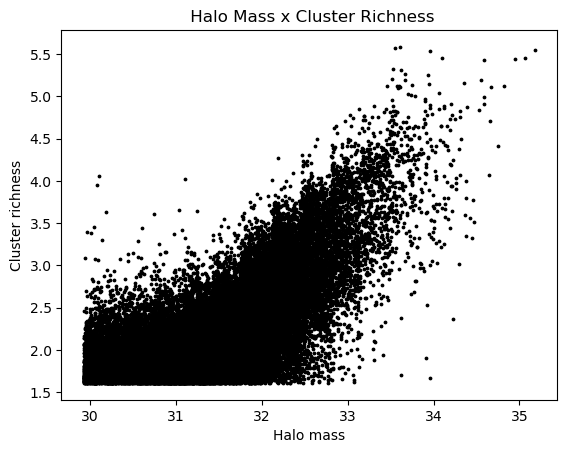

In [11]:
plt.scatter(np.log(unique_matched_catalog['halo_mass']), np.log(unique_matched_catalog['richness']), c= 'k', s=3)
plt.ylabel('Cluster richness')
plt.xlabel('Halo mass')
plt.title(' Halo Mass x Cluster Richness')

plt.show()

In [12]:
# Table.from_pandas(unique_matched_catalog).write('match_ID.fits', overwrite=True)

In [ ]:
def prepare_catalogs(catalog1, catalog2, columns1, columns2):
        ''' It prepares the table to the matching. '''
        
        cat1 = catalog1.to_pandas().rename(columns = columns1)    
        cat2 = catalog2.to_pandas().rename(columns = columns2)

        #Member numbers:
        nmem_cat1 = pd.DataFrame(cat1['cat1_id'].value_counts())
        nmem_cat2 = pd.DataFrame(cat2['cat2_id'].value_counts())
        
        #It adds the 'members number' column to the catalogs:
        cat1_prepared = pd.merge(nmem_cat1, cat1, how='inner', on=['cat1_id']).rename(columns={'count': 'nmem_cat1'})
        cat2_prepared = pd.merge(nmem_cat2, cat2, how='inner', on=['cat2_id']).rename(columns={'count': 'nmem_cat2'})
 
        return cat1_prepared, cat2_prepared

def get_shared_members_fraction_catalog(matched_catalog, option = None):
   
    shared_count = matched_catalog.groupby(['cat1_id', 'cat2_id'])['cat2_id'].transform('count')
    
    if option == 'pmem1':
        
        matched_catalog['pmem_sum_cat1'] = matched_catalog.groupby(['cat1_id'])['pmem'].transform('sum') 
        frac_catalog1 = matched_catalog.groupby(['cat1_id', 'cat2_id'])['pmem'].transform('sum') / matched_catalog['pmem_sum_cat1']
        frac_catalog2 = shared_count / matched_catalog['nmem_cat2']

    elif option == 'pmem2':
        matched_catalog['pmem_sum_cat2'] = matched_catalog.groupby(['cat2_id'])['pmem'].transform('sum') 
        frac_catalog1 = shared_count / matched_catalog['nmem_cat1']
        frac_catalog2 = matched_catalog.groupby(['cat1_id', 'cat2_id'])['pmem'].transform('sum') / matched_catalog['pmem_sum_cat2']

    elif option == 'pmem':
        matched_catalog['pmem_sum_cat1'] = matched_catalog.groupby(['cat1_id'])['pmem'].transform('sum') 
        matched_catalog['pmem_sum_cat2'] = matched_catalog.groupby(['cat2_id'])['pmem'].transform('sum') 
        frac_catalog1 = matched_catalog.groupby(['cat1_id', 'cat2_id'])['pmem'].transform('sum') / matched_catalog['pmem_sum_cat1']
        frac_catalog2 = matched_catalog.groupby(['cat1_id', 'cat2_id'])['pmem'].transform('sum') / matched_catalog['pmem_sum_cat2']

    else:
        frac_catalog1 = shared_count / matched_catalog['nmem_cat1']
        frac_catalog2 = shared_count / matched_catalog['nmem_cat2']

    
    return shared_count, frac_catalog1, frac_catalog2


def match_by_id(catalog1, catalog2):

    #Matching
    matched_catalog = pd.merge(catalog1, catalog2, how='inner', on=['id'])   
    
    # Shared members fraction
    shared_frac = get_shared_members_fraction_catalog(matched_catalog)

    matched_catalog['shared_num'] = shared_frac[0]
    
    matched_catalog['shared_frac_cat1'] = shared_frac[1]
    matched_catalog['shared_frac_cat2'] = shared_frac[2]
    
    matched_catalog['cross_frac'] = np.array(matched_catalog['shared_frac_cat1']) *( np.array(matched_catalog['shared_frac_cat1']) + np.array(matched_catalog['shared_frac_cat2']) ) / 2 
    
    return matched_catalog

def get_max_fraction_candidates(object_data, canditate_object_tag, shared_fraction_option = 'shared_frac_cat1'):
   
    max_fraction = object_data[shared_fraction_option].max()
    
    return object_data[object_data[shared_fraction_option] == max_fraction][canditate_object_tag].unique()

In [ ]:
def matching(catalog1, catalog2, option= 'left'):

    matched_catalog = match_by_id(catalog1, catalog2)

    match_info = matched_catalog[['id', 'cat1_id', 'nmem_cat1', 'cat2_id', 'shared_num', 'shared_frac_cat1', 'shared_frac_cat2', 'cross_frac']].copy()
  
    
    # left

    match_info_sorted_left = match_info.sort_values(by = ['cat1_id', 'cross_frac'], ascending= [True, False]).drop_duplicates(subset=['cat1_id', 'cat2_id'], keep='first')

    matches_left = (match_info_sorted_left.groupby('cat1_id')['cat2_id'].agg(list).reset_index())
    matches_left = matches_left.rename(columns={'cat2_id': 'matches_left'})

    left = match_info_left.merge(matches_left, on='cat1_id', how='left').drop_duplicates(subset = ['cat1_id'], keep = 'first')

    
    # right
    match_info_sorted_right = match_info.sort_values(by = ['cat2_id', 'cross_frac'], ascending= [True, False]).drop_duplicates(subset=['cat2_id', 'cat1_id'], keep='first')

    matches_right = (match_info_sorted_right.groupby('cat2_id')['cat1_id'].agg(list).reset_index())
    matches_right = matches_right.rename(columns={'cat1_id': 'matches_left'})

    right = match_info_right.merge(matches_left, on='cat2_id', how='left').drop_duplicates(subset = ['cat2_id'], keep = 'first')


    # cross

    return match_info

In [ ]:
def get_members_number(self, catalog, object_tag):
        ''' It counts the number of rows (members) with a specifc ID ('object_tag' column) and 
        returns a Pandas DataFrame with the ID and the number of rows (members) associated with the id.'''
        
        return pd.DataFrame(catalog[object_tag].value_counts())
           
    
    def fill_out_members_number(self, catalog, object_tag):
        ''' It creates a new dataframe for the catalog with a members number column. '''
        
        return pd.merge(get_members_number(catalog, object_tag), catalog, how='inner', on=[object_tag])
 

#### Left and Right

In [ ]:
match_info_left = match_info.sort_values(by = ['cat1_id', 'cross_frac'], ascending= [True, False]).drop_duplicates(subset=['cat1_id', 'cat2_id'], keep='first')

matches_left = (match_info_left.groupby('cat1_id')['cat2_id'].agg(list).reset_index())
matches_left = matches_left.rename(columns={'cat2_id': 'matches_left'})

left = match_info_left.merge(matches_left, on='cat1_id', how='left').drop_duplicates(subset = ['cat1_id'], keep = 'first')

In [ ]:
left.head(3)

In [ ]:
match_info_sorted_right = match_info.sort_values(by = ['cat2_id', 'cross_frac'], 
                                                 ascending= [True, False]).drop_duplicates(subset=['cat2_id', 'cat1_id'], keep='first')

matches_right = (match_info_sorted_right.groupby('cat2_id')['cat1_id'].agg(list).reset_index())
matches_right = matches_right.rename(columns={'cat1_id': 'matches_right'})

right = match_info_sorted_right.merge(matches_right, on='cat2_id', how='left').drop_duplicates(subset = ['cat2_id'], keep = 'first')

In [ ]:
right.head(3)

In [ ]:
RM_cat_bij, halo_cat_bij = get_matched_pairs(RM_cat, halo_cat, 'cross')

diff = np.isin(m['cat1_id'], RM_cat_bij['id'], invert=True)

m[diff]

In [ ]:
RM_cat_bij, halo_cat_bij = get_matched_pairs(RM_cat, halo_cat, 'cross')

diff = np.isin(m['cat2_id'], halo_cat_bij['id'], invert=True)

m[diff]

In [ ]:
# # max_weight_matching returns a set of node pairs
# m = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False)

# matching = []
# total = 0.0
# for u,v in m:
#     # u,v are nodes like ("A","a1") and ("B","b1")
#     if u[0]=="A":
#         a,u_b = u[1], v[1]
#     else:
#         a,u_b = v[1], u[1]
#     w = G[u][v]['weight']
#     matching.append((a, u_b, w))
#     total += w

# print("matching:", matching)
# print("total weight:", total)


In [ ]:
right.sort_values(by = ['cat1_id'])

In [ ]:
pd.merge(right.sort_values(by = ['cat1_id', 'cross_frac'], ascending= [True, False] ), left[['cat1_id', 'matches_left']], on = 'cat1_id', how= 'left')

In [ ]:
left

In [ ]:
right[right['cat1_id'] ==  33]

In [ ]:
right[right['cat1_id'] ==  48]

In [ ]:
left[left['cat1_id'] ==  48]

In [ ]:
RM_cat_bij, halo_cat_bij = get_matched_pairs(RM_cat, halo_cat, 'cat2')

In [ ]:
df1 = left[['cat1_id', 'cat2_id']]

In [ ]:
df2 = pd.DataFrame({
    'cat1_id': RM_cat_bij['id'],
    'cat2_id': RM_cat_bij['mt_other']
})


In [ ]:
comparacao = pd.merge(df1, df2, how='outer', indicator=True)
diferencas = comparacao[comparacao['_merge'] != 'both']
diferencas = diferencas.drop(columns='_merge')

In [ ]:
diferencas

In [ ]:
right[right['cat2_id'] == 193300079365]

In [ ]:
left[left['cat1_id'] == 576]

In [ ]:
right[right['cat1_id'] == 47]

In [ ]:
RM_cat_bij[RM_cat_bij['id'] == '1']

In [ ]:
halo_cat_bij[halo_cat_bij['id'] == '1158700069300']